In [1]:
# importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Loading files and pre-processing data

In [3]:
df_all = pd.DataFrame()


import glob

file_name_list = []
for file in glob.glob("Training_files/*.xlsx"):
    df_temp = pd.read_excel(file)

    df_all = df_all.append(df_temp)

In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 0 to 51
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time (yrs)              832 non-null    int64  
 1   E01                     832 non-null    int64  
 2   E02                     832 non-null    int64  
 3   E03                     832 non-null    int64  
 4   E04                     832 non-null    int64  
 5   E05                     832 non-null    int64  
 6   E06                     832 non-null    int64  
 7   I01                     832 non-null    int64  
 8   I02                     832 non-null    int64  
 9   I03                     832 non-null    int64  
 10  NW01                    832 non-null    int64  
 11  NW02                    832 non-null    int64  
 12  NW03                    832 non-null    int64  
 13  NW04                    832 non-null    int64  
 14  NW05                    832 non-null    int

In [5]:
df_all = df_all.dropna()
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 1 to 51
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time (yrs)              765 non-null    int64  
 1   E01                     765 non-null    int64  
 2   E02                     765 non-null    int64  
 3   E03                     765 non-null    int64  
 4   E04                     765 non-null    int64  
 5   E05                     765 non-null    int64  
 6   E06                     765 non-null    int64  
 7   I01                     765 non-null    int64  
 8   I02                     765 non-null    int64  
 9   I03                     765 non-null    int64  
 10  NW01                    765 non-null    int64  
 11  NW02                    765 non-null    int64  
 12  NW03                    765 non-null    int64  
 13  NW04                    765 non-null    int64  
 14  NW05                    765 non-null    int

In [6]:
training = df_all.copy()

In [7]:
training = training.drop(['OpEx_pump (‚Ç¨)', 'CapEx (‚Ç¨)','OpEx (‚Ç¨)','LCOH costs','discounted LCOH costs','discounted LCOH energy','cashflow','NPV','LCOH_cum'], axis = 1)
training.head()

,Time (yrs),E01,E02,E03,E04,E05,E06,I01,I02,I03,NW01,NW02,NW03,NW04,NW05,NW06,NW07,NW08,NW09,NW10,NW11,NW12,NW13,NW14,NW15,NW16,NW17,NW18,P01,P02,P03,D1 percentage,D2 presentage,D1 rate,D2 rate,System power (MW),System power D1 (MW),System power D2 (MW),Produced Energy (MWh),LCOH (‚Ç¨/MWh)
1,1,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.948,0.518,37904,25876,156.688195,96.893802,59.794393,1.372589e+06,102.654967
2,2,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.948,0.518,37904,25876,157.632978,96.867138,60.765841,1.380865e+06,57.644692
3,3,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.948,0.518,37904,25876,158.022435,96.830096,61.192339,1.384277e+06,42.695722
4,4,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.948,0.518,37904,25876,158.281181,96.791231,61.489951,1.386543e+06,35.245288
5,5,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.948,0.518,37904,25876,158.480756,96.753499,61.727258,1.388291e+06,30.789405


In [8]:
x_train = copy.copy(training)
del x_train['LCOH (‚Ç¨/MWh)']
x_train.head()

,Time (yrs),E01,E02,E03,E04,E05,E06,I01,I02,I03,NW01,NW02,NW03,NW04,NW05,NW06,NW07,NW08,NW09,NW10,NW11,NW12,NW13,NW14,NW15,NW16,NW17,NW18,P01,P02,P03,D1 percentage,D2 presentage,D1 rate,D2 rate,System power (MW),System power D1 (MW),System power D2 (MW),Produced Energy (MWh)
1,1,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.948,0.518,37904,25876,156.688195,96.893802,59.794393,1.372589e+06
2,2,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.948,0.518,37904,25876,157.632978,96.867138,60.765841,1.380865e+06
3,3,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.948,0.518,37904,25876,158.022435,96.830096,61.192339,1.384277e+06
4,4,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.948,0.518,37904,25876,158.281181,96.791231,61.489951,1.386543e+06
5,5,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.948,0.518,37904,25876,158.480756,96.753499,61.727258,1.388291e+06


In [9]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 1 to 51
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time (yrs)             765 non-null    int64  
 1   E01                    765 non-null    int64  
 2   E02                    765 non-null    int64  
 3   E03                    765 non-null    int64  
 4   E04                    765 non-null    int64  
 5   E05                    765 non-null    int64  
 6   E06                    765 non-null    int64  
 7   I01                    765 non-null    int64  
 8   I02                    765 non-null    int64  
 9   I03                    765 non-null    int64  
 10  NW01                   765 non-null    int64  
 11  NW02                   765 non-null    int64  
 12  NW03                   765 non-null    int64  
 13  NW04                   765 non-null    int64  
 14  NW05                   765 non-null    int64  
 15  NW06   

In [10]:
y_train = training.iloc[:,-1]
y_train.head()

1    102.654967
2     57.644692
3     42.695722
4     35.245288
5     30.789405
Name: LCOH (‚Ç¨/MWh), dtype: float64

In [11]:
df_test = pd.DataFrame()


import glob

for file in glob.glob("Test_files/*.xlsx"):
    df_temp = pd.read_excel(file)
    print (file)
    df_test = df_test.append(df_temp)

Test_files\NW13to18_Sheet5.xlsx
Test_files\NW1to6_Sheet5.xlsx
Test_files\NW7to12_Sheet5.xlsx
Test_files\NWopt_Sheet5.xlsx


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 51
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time (yrs)              208 non-null    int64  
 1   E01                     208 non-null    int64  
 2   E02                     208 non-null    int64  
 3   E03                     208 non-null    int64  
 4   E04                     208 non-null    int64  
 5   E05                     208 non-null    int64  
 6   E06                     208 non-null    int64  
 7   I01                     208 non-null    int64  
 8   I02                     208 non-null    int64  
 9   I03                     208 non-null    int64  
 10  NW01                    208 non-null    int64  
 11  NW02                    208 non-null    int64  
 12  NW03                    208 non-null    int64  
 13  NW04                    208 non-null    int64  
 14  NW05                    208 non-null    int

In [13]:
df_test = df_test.dropna()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 51
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time (yrs)              204 non-null    int64  
 1   E01                     204 non-null    int64  
 2   E02                     204 non-null    int64  
 3   E03                     204 non-null    int64  
 4   E04                     204 non-null    int64  
 5   E05                     204 non-null    int64  
 6   E06                     204 non-null    int64  
 7   I01                     204 non-null    int64  
 8   I02                     204 non-null    int64  
 9   I03                     204 non-null    int64  
 10  NW01                    204 non-null    int64  
 11  NW02                    204 non-null    int64  
 12  NW03                    204 non-null    int64  
 13  NW04                    204 non-null    int64  
 14  NW05                    204 non-null    int

In [14]:
test = df_test.copy()

In [15]:
test = test.drop(['OpEx_pump (‚Ç¨)', 'CapEx (‚Ç¨)','OpEx (‚Ç¨)','LCOH costs','discounted LCOH costs','discounted LCOH energy','cashflow','NPV','LCOH_cum'], axis = 1)
test.head()

,Time (yrs),E01,E02,E03,E04,E05,E06,I01,I02,I03,NW01,NW02,NW03,NW04,NW05,NW06,NW07,NW08,NW09,NW10,NW11,NW12,NW13,NW14,NW15,NW16,NW17,NW18,P01,P02,P03,D1 percentage,D2 presentage,D1 rate,D2 rate,System power (MW),System power D1 (MW),System power D2 (MW),Produced Energy (MWh),LCOH (‚Ç¨/MWh)
1,1,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,141.796847,81.593024,60.203823,1.242140e+06,112.521884
2,2,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,142.720605,81.562769,61.157836,1.250233e+06,62.762081
3,3,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,143.105999,81.523629,61.582370,1.253609e+06,46.234354
4,4,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,143.363249,81.483004,61.880245,1.255862e+06,37.995863
5,5,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,143.562056,81.443991,62.118065,1.257604e+06,33.067767


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 51
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time (yrs)             204 non-null    int64  
 1   E01                    204 non-null    int64  
 2   E02                    204 non-null    int64  
 3   E03                    204 non-null    int64  
 4   E04                    204 non-null    int64  
 5   E05                    204 non-null    int64  
 6   E06                    204 non-null    int64  
 7   I01                    204 non-null    int64  
 8   I02                    204 non-null    int64  
 9   I03                    204 non-null    int64  
 10  NW01                   204 non-null    int64  
 11  NW02                   204 non-null    int64  
 12  NW03                   204 non-null    int64  
 13  NW04                   204 non-null    int64  
 14  NW05                   204 non-null    int64  
 15  NW06   

In [17]:
x_test = copy.copy(test)
del x_test['LCOH (‚Ç¨/MWh)']
x_test.head()

,Time (yrs),E01,E02,E03,E04,E05,E06,I01,I02,I03,NW01,NW02,NW03,NW04,NW05,NW06,NW07,NW08,NW09,NW10,NW11,NW12,NW13,NW14,NW15,NW16,NW17,NW18,P01,P02,P03,D1 percentage,D2 presentage,D1 rate,D2 rate,System power (MW),System power D1 (MW),System power D2 (MW),Produced Energy (MWh)
1,1,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,141.796847,81.593024,60.203823,1.242140e+06
2,2,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,142.720605,81.562769,61.157836,1.250233e+06
3,3,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,143.105999,81.523629,61.582370,1.253609e+06
4,4,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,143.363249,81.483004,61.880245,1.255862e+06
5,5,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,143.562056,81.443991,62.118065,1.257604e+06


In [18]:
y_test = test.iloc[:,-1]
y_test.head()

1    112.521884
2     62.762081
3     46.234354
4     37.995863
5     33.067767
Name: LCOH (‚Ç¨/MWh), dtype: float64

### Data is ready ---> ML model implementation and results

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor


In [40]:
reg_model = Pipeline([
        ("scalers", MinMaxScaler()),
        ("model", DecisionTreeRegressor()),
    ])

In [41]:
reg_model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scalers', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 DecisionTreeRegressor(criterion='mse', max_depth=None,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=None,
                                       splitter='best'))],
         verbose=False)

In [42]:
# evaluate the keras model
y_pred = reg_model.predict(x_test)
reg_model.score(x_test,y_test)

0.7356398960770137

In [43]:
comp1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comp1

,Actual,Predicted
1,112.521884,108.222696
2,62.762081,59.674852
3,46.234354,44.077503
4,37.995863,37.775011
5,33.067767,33.165267
6,29.792834,28.558376
7,27.461635,28.558376
8,25.719807,24.714323
9,24.370656,23.441536
10,23.296270,22.847336


In [44]:
comparing1 = pd.concat([test, comp1], axis=1)
display(comparing1)

,Time (yrs),E01,E02,E03,E04,E05,E06,I01,I02,I03,NW01,NW02,NW03,NW04,NW05,NW06,NW07,NW08,NW09,NW10,NW11,NW12,NW13,NW14,NW15,NW16,NW17,NW18,P01,P02,P03,D1 percentage,D2 presentage,D1 rate,D2 rate,System power (MW),System power D1 (MW),System power D2 (MW),Produced Energy (MWh),LCOH (‚Ç¨/MWh),Actual,Predicted
1,1,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,141.796847,81.593024,60.203823,1.242140e+06,112.521884,112.521884,108.222696
2,2,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,142.720605,81.562769,61.157836,1.250233e+06,62.762081,62.762081,59.674852
3,3,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,143.105999,81.523629,61.582370,1.253609e+06,46.234354,46.234354,44.077503
4,4,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,143.363249,81.483004,61.880245,1.255862e+06,37.995863,37.995863,37.775011
5,5,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,143.562056,81.443991,62.118065,1.257604e+06,33.067767,33.067767,33.165267
6,6,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,143.725216,81.408141,62.317076,1.259033e+06,29.792834,29.792834,28.558376
7,7,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,143.862573,81.375499,62.487074,1.260236e+06,27.461635,27.461635,28.558376
8,8,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,143.978521,81.345306,62.633215,1.261252e+06,25.719807,25.719807,24.714323
9,9,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,144.074837,81.316334,62.758503,1.262096e+06,24.370656,24.370656,23.441536
10,10,1,1,1,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,2,1,2,0.795,0.52,31813,26042,144.151388,81.287131,62.864257,1.262766e+06,23.296270,23.296270,22.847336


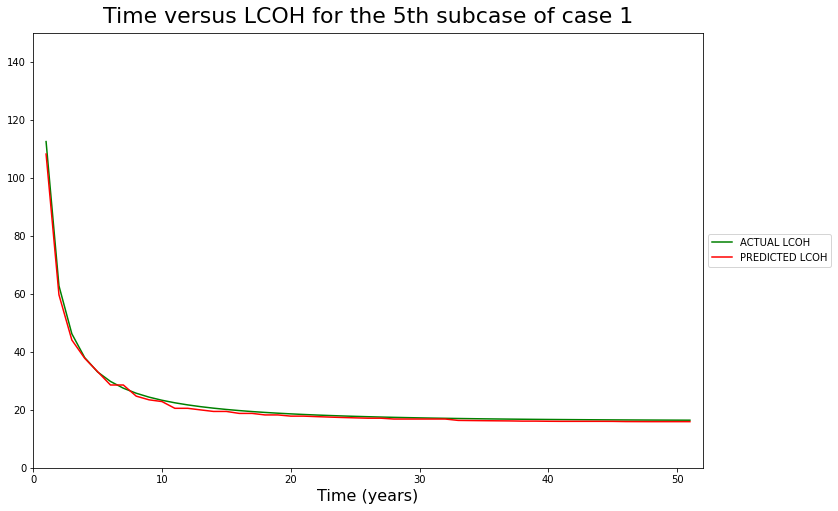

In [45]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(comparing1.iloc[0:51,0],comparing1.iloc[0:51,40],'-g',label='ACTUAL LCOH')
plt.plot(comparing1.iloc[0:51,0],comparing1.iloc[0:51,41],'-r',label='PREDICTED LCOH')
plt.xlim(0,52)
plt.ylim(0,150)
plt.xlabel('Time (years)', fontsize=16)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Time versus LCOH for the 5th subcase of case 1'.format(comparing1.iloc[0,3],int(comparing1.iloc[0,4])), fontsize = 22, pad = 10)
plt.show()

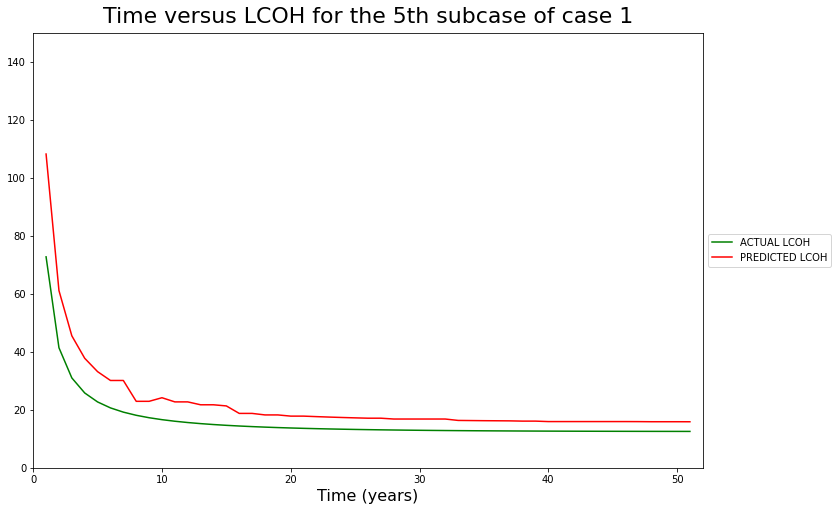

In [48]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(comparing1.iloc[51:102,0],comparing1.iloc[51:102,40],'-g',label='ACTUAL LCOH')
plt.plot(comparing1.iloc[51:102,0],comparing1.iloc[51:102,41],'-r',label='PREDICTED LCOH')
plt.xlim(0,52)
plt.ylim(0,150)
plt.xlabel('Time (years)', fontsize=16)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Time versus LCOH for the 5th subcase of case 2'.format(comparing1.iloc[0,3],int(comparing1.iloc[0,4])), fontsize = 22, pad = 10)
plt.show()

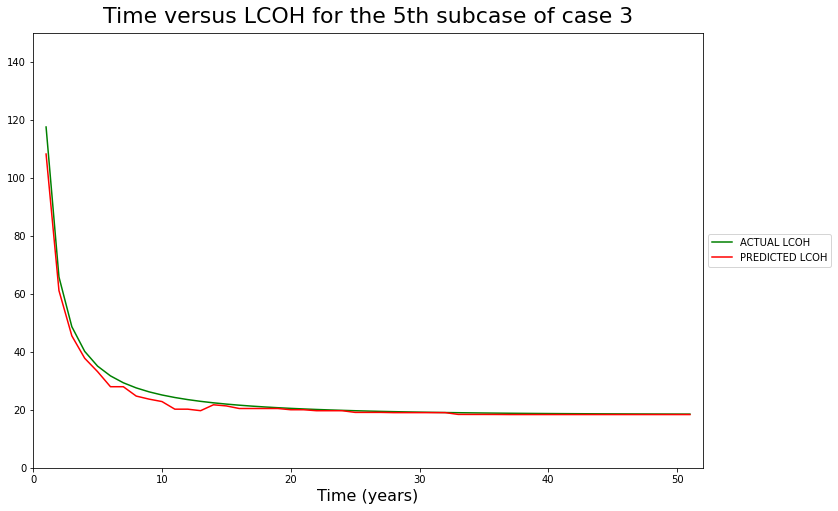

In [54]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(comparing1.iloc[102:153,0],comparing1.iloc[102:153,40],'-g',label='ACTUAL LCOH')
plt.plot(comparing1.iloc[102:153,0],comparing1.iloc[102:153,41],'-r',label='PREDICTED LCOH')
plt.xlim(0,52)
plt.ylim(0,150)
plt.xlabel('Time (years)', fontsize=16)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Time versus LCOH for the 5th subcase of case 3'.format(comparing1.iloc[0,3],int(comparing1.iloc[0,4])), fontsize = 22, pad = 10)
plt.show()

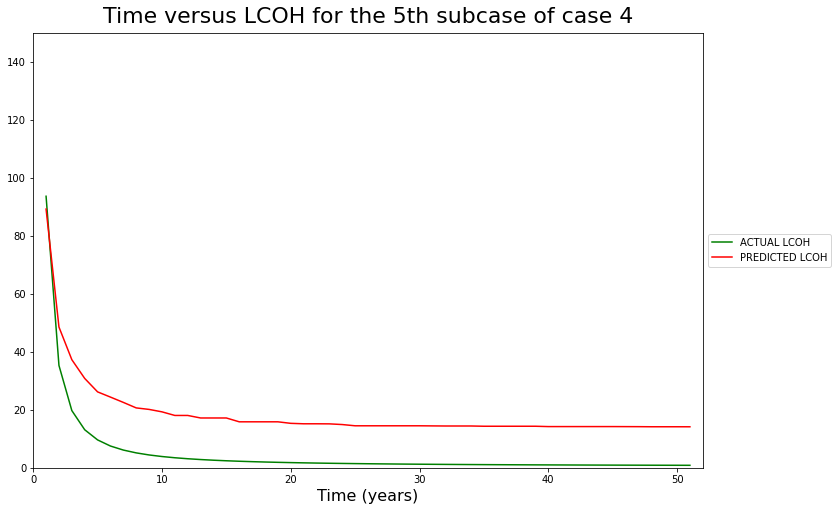

In [55]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(comparing1.iloc[153:204,0],comparing1.iloc[153:204,40],'-g',label='ACTUAL LCOH')
plt.plot(comparing1.iloc[153:204,0],comparing1.iloc[153:204,41],'-r',label='PREDICTED LCOH')
plt.xlim(0,52)
plt.ylim(0,150)
plt.xlabel('Time (years)', fontsize=16)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Time versus LCOH for the 5th subcase of case 4'.format(comparing1.iloc[0,3],int(comparing1.iloc[0,4])), fontsize = 22, pad = 10)
plt.show()